In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

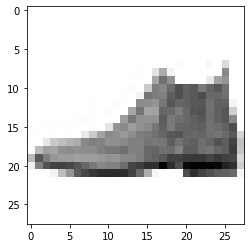

(60000, 28, 28)

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images
train_labels = train_labels
test_images = test_images
test_labels = test_labels

plt.imshow(test_images[0], interpolation='nearest', cmap=plt.cm.binary)
plt.show()

train_images.shape

In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(8, 3, strides=(1, 1), padding="valid", activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, 3, strides=(1, 1), padding="valid", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, 3, strides=(1, 1), padding="valid", activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(28, activation='relu'),
  tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Epoch 1/2
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4581 - accuracy: 0.8286
Epoch 2/2
1875/1875 [==============================] - 16s 9ms/step - loss: 0.4548 - accuracy: 0.8299
313/313 - 1s - loss: 0.4969 - accuracy: 0.8181 - 1s/epoch - 5ms/step
Prediction:
9
2
1
1
6

Label+Img:
9


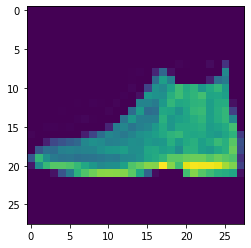


2


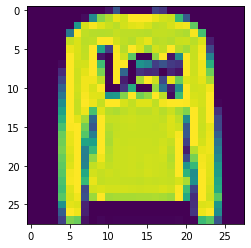


1


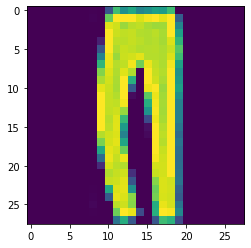


1


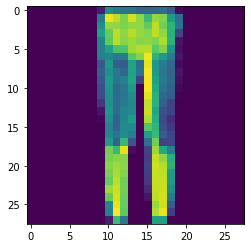


6


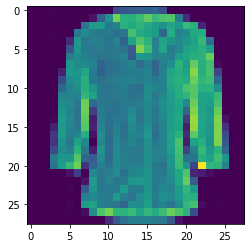

In [24]:

model.fit(train_images, train_labels, batch_size=32, epochs=2)

model.evaluate(test_images,  test_labels, verbose=2)

#def Predictions
def pred_out(x):
    print("Prediction:")
    output_pred = model.predict(test_images[:x])
    for i in range(len(output_pred)):
        print(np.argmax(output_pred[i]))
    print("")

#def Labels
def label_out(x):
    print("Label+Img:")
    labels = test_labels[:x]
    for j in range(x):
        print(labels[j])
        plt.imshow(test_images[j], interpolation="nearest")
        plt.show()
        print("")

size = 5

pred_out(size)
label_out(size)